## ERC NN ESTIMATION

First Approach to NN probabilities estimation. 
Based on the data base used in "Explainable Prediction of Chronic Renal Disease in the Colombian Population using Neural
Networks and Case-Based Reasoning"




IMPORT THE REQUIRED MODULES

In [ ]:
pip install plotly==4.8.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pickle

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

IMPORT THE DATASET

In [ ]:
df = pd.read_csv("./DatasetERC/Base_ERC_Clean.csv",sep=";")

df


,PersonaID,Sexo,Edad,Etnia,Departamento,ERC,A084,A09X,B029,B07X,...,R635,R739,S025,S202,S400,S800,S934,T784,T888,Y849
0,9529519,M,70,NINGUNA,BOGOTA_DC,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29643113,M,58,NINGUNA,BOGOTA_DC,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,78665144,F,29,NINGUNA,ANTIOQUIA,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,29816474,M,81,NINGUNA,BOGOTA_DC,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36281215,M,76,NINGUNA,BOGOTA_DC,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,8964043,F,52,OTRAS_ETNIAS,ANTIOQUIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,123121653,M,22,NINGUNA,CESAR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,39911133,M,46,NINGUNA,NARINO,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,49230066,F,38,NINGUNA,BOGOTA_DC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The variables of the dataset are the following:

In [ ]:
df.columns

In [ ]:
pd.set_option('display.max_rows',8000)
df.dtypes

PersonaID        int64
Sexo            object
Edad             int64
Etnia           object
Departamento    object
ERC              int64
A084             int64
A09X             int64
B029             int64
B07X             int64
B349             int64
B351             int64
B369             int64
B49X             int64
B829             int64
C509             int64
D259             int64
D509             int64
D649             int64
E039             int64
E102             int64
E106             int64
E107             int64
E108             int64
E109             int64
E116             int64
E118             int64
E119             int64
E139             int64
E149             int64
E162             int64
E660             int64
E669             int64
E780             int64
E781             int64
E782             int64
E784             int64
E785             int64
F321             int64
F412             int64
F419             int64
F840             int64
F900             int64
F949       

In [ ]:
# Define the independent variables
ind_cols=["Edad","E119","M255","N390","I10X","J449","M542","E109","R104","R51X","I839","R520","H400","M791","M545"]

# Split the dataset into training and test dataset

x=pd.DataFrame(df[ind_cols])
y=pd.DataFrame(df["ERC"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
x_train.shape

(28000, 15)

In [ ]:
NN_1=MLPClassifier(hidden_layer_sizes=(500,100,50), 
                   activation='relu', 
                   solver='sgd', alpha=0.0001, 
                   batch_size='auto', learning_rate='constant', 
                   learning_rate_init=0.001, power_t=0.5, 
                   max_iter=10, shuffle=True, random_state=None,
                   tol=0.0001, verbose=False, warm_start=False, 
                   momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, 
                   beta_1=0.9, beta_2=0.999, 
                   epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

NN1_result=NN_1.fit(x_train, y_train)

C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
NN1_result.score(x_test, y_test)

0.85775

In [ ]:
NN1_result.predict_proba(x_test)

array([[0.22330959, 0.77669041],
       [0.94364644, 0.05635356],
       [0.02520524, 0.97479476],
       ...,
       [0.93806655, 0.06193345],
       [0.82608722, 0.17391278],
       [0.91117361, 0.08882639]])

In [ ]:
# save the model to disk
filename = 'NN1.pkl'
pickle.dump(NN1_result, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(x_test.head(10))
print(result)

[[0.22330959 0.77669041]
 [0.94364644 0.05635356]
 [0.02520524 0.97479476]
 [0.19565069 0.80434931]
 [0.18115254 0.81884746]
 [0.94507045 0.05492955]
 [0.38333986 0.61666014]
 [0.34524481 0.65475519]
 [0.95472878 0.04527122]
 [0.08498288 0.91501712]]


In [ ]:
# Define the independent variables
ind_cols=["Edad","E119","M255","N390","I10X"]

# Split the dataset into training and test dataset

x=pd.DataFrame(df[ind_cols])
y=pd.DataFrame(df["ERC"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
x_train.shape

(28000, 5)

In [ ]:
NN_2=MLPClassifier(hidden_layer_sizes=(500,100,50), 
                   activation='relu', 
                   solver='sgd', alpha=0.0001, 
                   batch_size='auto', learning_rate='constant', 
                   learning_rate_init=0.001, power_t=0.5, 
                   max_iter=10, shuffle=True, random_state=None,
                   tol=0.0001, verbose=False, warm_start=False, 
                   momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, 
                   beta_1=0.9, beta_2=0.999, 
                   epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

NN2_result=NN_2.fit(x_train, y_train)

C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
NN2_result.score(x_test, y_test)

0.8235

In [ ]:
NN2_result.predict_proba(x_test)

array([[0.00651837, 0.99348163],
       [0.0564255 , 0.9435745 ],
       [0.01200255, 0.98799745],
       ...,
       [0.93988802, 0.06011198],
       [0.73701162, 0.26298838],
       [0.85783041, 0.14216959]])

In [ ]:
# save the model to disk
filename = 'NN2.pkl'
pickle.dump(NN2_result, open(filename, 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
>>> scaler = StandardScaler()  # doctest: +SKIP
>>> # Don't cheat - fit only on training data
>>> scaler.fit(x_train)  # doctest: +SKIP
>>> x_train = scaler.transform(x_train)  # doctest: +SKIP
>>> # apply same transformation to test data
>>> x_test = scaler.transform(x_test)  # doctest: +SKIP

In [ ]:
NN_3=MLPClassifier(hidden_layer_sizes=(500,100,50), 
                   activation='relu', 
                   solver='adam', alpha=0.0001, 
                   batch_size='auto', learning_rate='constant', 
                   learning_rate_init=0.001, power_t=0.5, 
                   max_iter=10, shuffle=True, random_state=None,
                   tol=0.0001, verbose=False, warm_start=False, 
                   momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, 
                   beta_1=0.9, beta_2=0.999, 
                   epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

NN3_result=NN_3.fit(x_train, y_train)

C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
NN3_result.score(x_test, y_test)

0.8620833333333333

Confusion matrix, without normalization
[[4919 1048]
 [ 607 5426]]
Normalized confusion matrix
[[0.82436735 0.17563265]
 [0.10061329 0.89938671]]


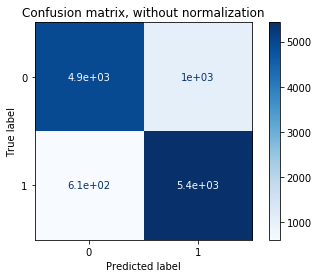

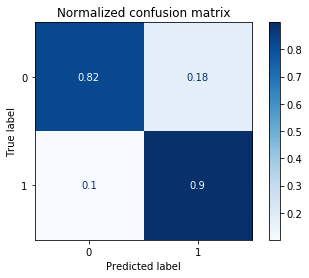

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = np.unique(df.ERC)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(NN3_result, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.928


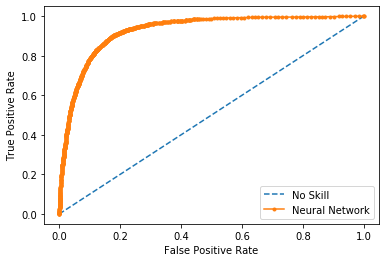

In [ ]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
NN3_probs=NN3_result.predict_proba(x_test)

# keep probabilities for the positive outcome only
NN3_probs = NN3_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
NN3_auc = roc_auc_score(y_test, NN3_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (NN3_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, NN3_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
# save the model to disk
filename = 'NN2.pkl'
pickle.dump(NN3_result, open(filename, 'wb'))